C:\Users\andre\AppData\Local\Temp\ipykernel_23684\1218750352.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n=math.ceil(np.random.uniform(200,300,1))
C:\Users\andre\AppData\Local\Temp\ipykernel_23684\1218750352.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  j_range=math.ceil(np.random.uniform(500,1500,1))


TREND IS:  -1  , STARTS AT:  205
TREND IS:  -1  , STARTS AT:  1003
TREND IS:  -1  , STARTS AT:  1643
TOTAL ITERATIONS:  5000
5000 5000


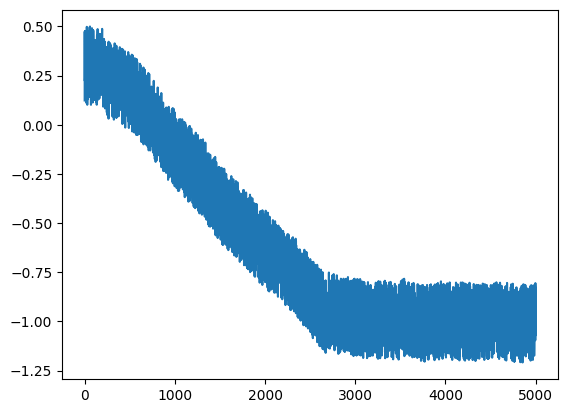

In [1]:
import random
import numpy as np
import math
from itertools import repeat
import seaborn as sns
import pandas as pd
def define_vibration_axis_uniform_random(number_of_intervals):
    n=math.ceil(np.random.uniform(200,300,1))
    vib_min=0.1
    vib_max=0.5
    vibration_axis = np.random.uniform(vib_min, vib_max,n)
    code=[0]*n
    trend_n=n
    for i in range(number_of_intervals):
        tmp=random.choice([0,1,-1])
        variation=tmp
        j_range=math.ceil(np.random.uniform(500,1500,1))
        for j in range(j_range):
            vibration_axis=np.append(vibration_axis,np.random.uniform(np.average(vibration_axis[-200:])-(-1*vib_min+vib_max)/2+variation*0.05, np.average(vibration_axis[-200:])+(-1*vib_min+vib_max)/2+variation*0.05,1))
        if (tmp==-1):
            tmp=2
        code.extend(repeat(tmp, j_range))
        print("TREND IS: ",variation," , STARTS AT: ",trend_n)
        trend_n+=j
    a=5000-len(code)
    if (a>0):
        variation=0
        tmp=0
        for j in range(a):
            vibration_axis=np.append(vibration_axis,np.random.uniform(np.average(vibration_axis[-200:])-(-1*vib_min+vib_max)/2+variation*0.05, np.average(vibration_axis[-200:])+(-1*vib_min+vib_max)/2+variation*0.05,1))
        code.extend(repeat(tmp, a))
    sns.lineplot(data=vibration_axis)
    
    print("TOTAL ITERATIONS: ",len(vibration_axis))
    print(len(code),len(vibration_axis))
    df=pd.DataFrame({"Trend type":code,"Data":vibration_axis})
    return df

vib_axis_df=define_vibration_axis_uniform_random(3)

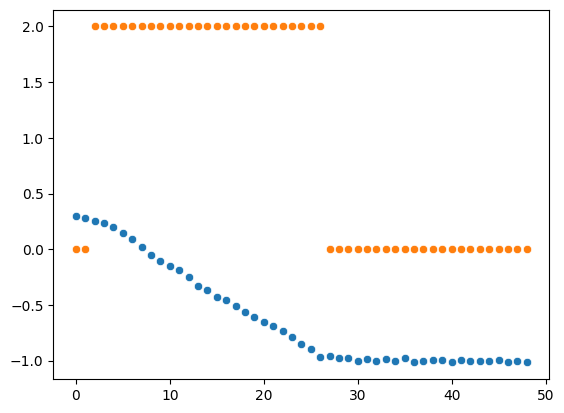

In [2]:
def stratify_by_n(df,n):
    iterations=math.floor(len(df)/n)
    average=[]
    trend=[]
    for i in range(iterations-1):
        average.append(np.average(df.iloc[i*n:n*(i+1),1]))
        trend.append(round(np.average(df.iloc[i*n:n*(i+1),0])))
    sns.scatterplot(data=average)
    sns.scatterplot(data=trend)
    return pd.DataFrame({'Trend':trend,'Data':average})
dff=stratify_by_n(vib_axis_df,100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4199556	total: 159ms	remaining: 15.7s
99:	learn: 0.0090644	total: 29.2s	remaining: 0us


<Axes: ylabel='Data'>

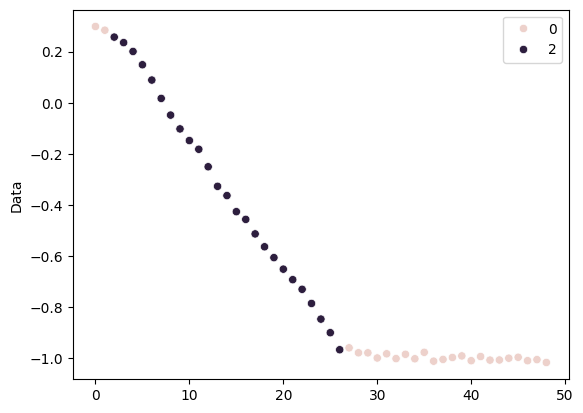

In [3]:
import numpy as np
from catboost import CatBoostClassifier, Pool

# initialize data
train_data = dff["Data"]
train_labels = dff["Trend"]

test_data = catboost_pool = Pool(train_data,
                                 train_labels)

model = CatBoostClassifier(iterations=100,
                           depth=16,
                           learning_rate=0.5,
                           loss_function='MultiClass',
                           verbose=100)
# train the model
model.fit(train_data, train_labels,plot=True)
# make the prediction using the resulting model
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
#print("class = ", preds_class)
#print("proba = ", preds_proba)
#print(preds_class.tolist())
a=[]
for i in range(len(preds_class)):
    a.append(preds_class[i][0])
#print(a)
df=pd.DataFrame({"Class":a,"Data":train_data})
#sns.scatterplot(data=vib_axis_df,x=[i for i in range(5000)],y="Data",hue="Trend type")
sns.scatterplot(data=df,x=[i for i in range(49)],y="Data",hue=a)